手动造个数据集

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

r = np.random.randn(200)*0.8
x1 = np.linspace(-3, 1, 200)
x2 = np.linspace(-1, 3, 200)
y1 = x1*x1 + 2*x1 - 2 + r
y2 = -x2*x2 + 2*x2 + 2 + r

X = np.hstack(([x1, y1],[x2, y2])) # 输入样本 X，维度
Y = np.hstack((np.zeros((1,200)),np.ones((1,200))))  # 输出标签 Y

展示到平面上

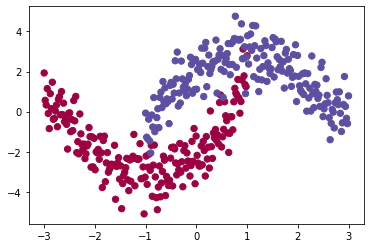

In [3]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

定义神经网络输入层、隐藏层、输出层神经元个数

In [4]:
m = X.shape[1] # 样本个数
n_x = X.shape[0] # 输入层神经元个数
n_h = 3 # 隐藏层神经元个数
n_y = Y.shape[0] # 输出层神经元个数

初始化W和b

In [5]:
W1 = np.random.randn(n_h,n_x)*0.01
b1 = np.zeros((n_h,1))
W2 = np.random.randn(n_y,n_h)*0.01
b2 = np.zeros((n_y,1))

assert 语句对向量或者数组维度进行判断。
如果与给定的维度不同，则程序在此处停止运行。
assert 的灵活使用可以帮助我们及时检查神经网络模型中参数的维度是否正确。

In [6]:
assert (W1.shape == (n_h, n_x))
assert (b1.shape == (n_h, 1))
assert (W2.shape == (n_y, n_h))
assert (b2.shape == (n_y, 1))

把W和b写到字典parameters里

In [7]:
parameters = {"W1": W1,
"b1": b1,
"W2": W2,
"b2": b2}

定义sigmoid函数

In [8]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

定义正向传播函数

In [9]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
    "A1": A1,
    "Z2": Z2,
    "A2": A2}

    return A2, cache

定义损失函数，这里用的是交叉熵损失函数

In [10]:
def compute_cost(A2, Y, parameters):

    m = Y.shape[1] # number of example

    # 计算交叉熵损失函数
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    cost = - 1/m * np.sum(logprobs)

    cost = np.squeeze(cost) 

    return cost

定义反向传播

In [11]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    # 反向求导
    dZ2 = A2 - Y
    dW2 = 1/m*np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)

    # 存储各个梯度值
    grads = {"dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2}

    return grads

根据梯度下降算法，对网络参数 W 和 b 进行更新，并将新的网络参数存储在字典里。

In [12]:
def update_parameters(parameters, grads, learning_rate = 0.1):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}

    return parameters

搭建整个神经网络模型

各个模块已经写好，接下来要做的就是将各个模块组合起来，搭建整个神经网络模型。